In [2]:
data_path = "data_pre_processed.csv"

In [3]:
import pandas as pd
import numpy as np
import epiweeks
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

def calculate_morans_i(gdf, variable, threshold=1, binary=True, silence_warnings=True):
    w = weights.DistanceBand.from_dataframe(gdf, threshold=threshold, binary=binary, silence_warnings=silence_warnings)
    moran = esda.Moran(gdf[variable], w)
    
    return moran.I, moran.p_sim, w

def calculate_gearys_c(gdf, variable, threshold=1, binary=True, silence_warnings=True):
    from pysal.lib import weights
    from pysal.explore import esda
    
    w = weights.DistanceBand.from_dataframe(gdf, threshold=threshold, binary=binary, silence_warnings=silence_warnings)
    geary = esda.Geary(gdf[variable], w)
    
    return geary.C, geary.p_sim

/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/spaghetti/network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Prepare Geospatial Data

In [4]:
data = pd.read_csv(data_path)

gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data.Longitud, data.Latitud),
    crs="EPSG:4326"  # WGS84 Latitude/Longitude
)
gdf

,Municipality code,Municipality,Population2016,Population2017,Population2018,Cases2016,Cases2017,Cases2018,Age0-4(%),Age5-14(%),...,2017_dengue,2018_dengue,2016_temp,2017_temp,2018_temp,2016_precip,2017_precip,2018_precip,strata,geometry
0,5001,Medellín,2420516,2414616,2427129,17306,2100,1172,5.16,11.96,...,39.924528,22.666667,21.943911,21.350182,21.257987,170.860412,192.815909,215.531162,3,POINT (-75.58829 6.24935)
1,5002,Abejorral,19979,20047,20367,5,1,2,5.24,14.92,...,0.018868,0.039216,17.427445,16.812016,16.765922,170.362537,189.626654,213.986592,3,POINT (-75.46613 5.76641)
2,5004,Abriaquí,2539,2593,2695,2,0,1,6.07,14.08,...,0.000000,0.019608,17.989909,17.394741,17.339569,154.819131,182.611120,194.359353,2,POINT (-76.07685 6.65354)
3,5021,Alejandría,4543,4570,4657,5,0,0,6.59,15.73,...,0.000000,0.000000,21.773094,21.145504,21.053678,182.093695,203.085915,231.360449,3,POINT (-75.14133 6.37606)
4,5030,Amagá,29006,29429,30227,196,17,3,5.42,13.36,...,0.320755,0.058824,21.683445,21.088197,21.019708,161.462956,182.512327,202.977114,2,POINT (-75.70082 6.05159)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,97889,Yavaraté,1073,1027,1048,0,0,0,5.03,48.15,...,0.000000,0.000000,26.495327,25.959433,25.887254,302.846812,288.845788,299.388878,3,POINT (-69.20334 0.60914)
1114,99001,Puerto Carreño,20921,21087,20936,32,5,5,10.61,20.52,...,0.094340,0.098039,29.074172,28.353492,28.056971,225.019284,194.526000,198.746806,3,POINT (-68.11682 5.99815)
1115,99524,La Primavera,10098,10233,10122,72,0,3,10.37,23.27,...,0.000000,0.058824,28.600824,27.925774,27.713020,216.190884,202.300431,212.506434,3,POINT (-69.93895 5.79200)
1116,99624,Santa Rosalía,4296,4083,4059,14,9,0,9.34,25.34,...,0.169811,0.000000,27.970317,27.318024,27.171170,214.010459,202.843428,221.696004,3,POINT (-70.94903 4.99495)


In [5]:
data.strata

0       3
1       3
2       2
3       3
4       2
       ..
1113    3
1114    3
1115    3
1116    3
1117    3
Name: strata, Length: 1118, dtype: int64

In [6]:
data.columns

Index(['Municipality code', 'Municipality', 'Population2016', 'Population2017',
       'Population2018', 'Cases2016', 'Cases2017', 'Cases2018', 'Age0-4(%)',
       'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)',
       'IndianPopulation(%)', 'PeoplewithDisabilities(%)',
       'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)',
       'Employedpopulation(%)', 'Unemployedpopulation(%)',
       'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)',
       'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)',
       'Buildingstratification1(%)', 'Buildingstratification2(%)',
       'Buildingstratification3(%)', 'Buildingstratification4(%)',
       'Buildingstratification5(%)', 'Buildingstratification6(%)',
       'NumberofhospitalsperKm2', 'NumberofhousesperKm2', 'Código Municipio',
       'Longitud', 'Latitud', '2016_dengue', '2017_dengue', '2018_dengue',
       '2016_temp', '2017_temp', '2018_temp', '2016_precip', '20

### Calculate Spatial Autocorrelation (SAC): Moran and Geary

Column: Population2016, Moran's I: 0.002171658351039582, p-value: 0.123
Column: Population2016, geary's I: 1.0298259546836495, p_value_geary: 0.391


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


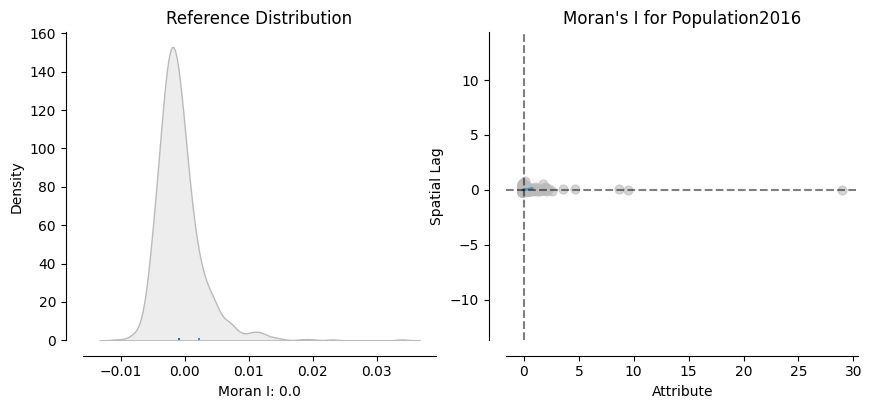

60 -
Column: Population2017, Moran's I: 0.002333080552787767, p-value: 0.124
Column: Population2017, geary's I: 1.0296567641181507, p_value_geary: 0.401


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


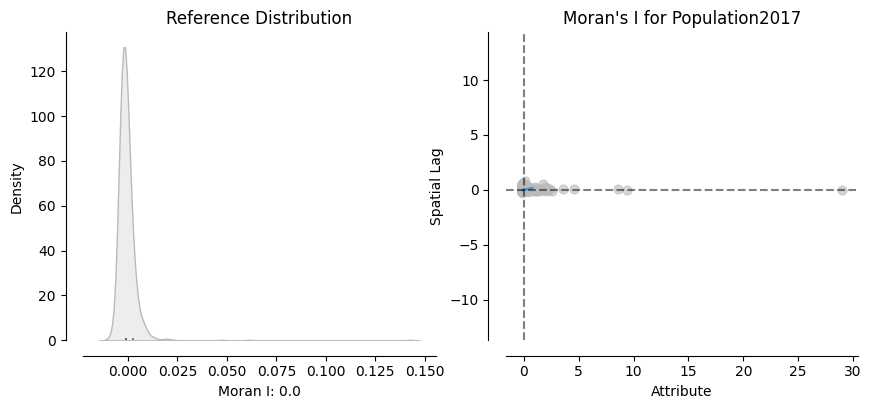

60 -
Column: Population2018, Moran's I: 0.002535473081544794, p-value: 0.128
Column: Population2018, geary's I: 1.0292734781856228, p_value_geary: 0.413


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


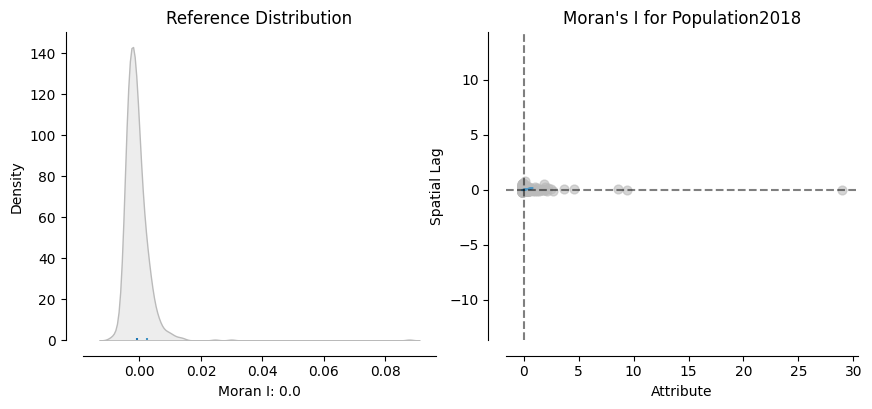

60 -
Column: Cases2016, Moran's I: 0.004074484087888983, p-value: 0.08
Column: Cases2016, geary's I: 0.9806195116676041, p_value_geary: 0.285


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


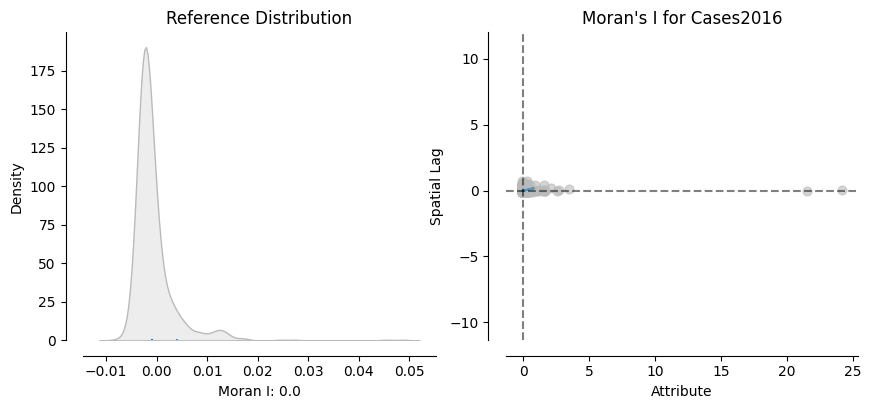

60 -
Column: Cases2017, Moran's I: 0.00429765403877558, p-value: 0.074
Column: Cases2017, geary's I: 0.9522145223223203, p_value_geary: 0.181


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


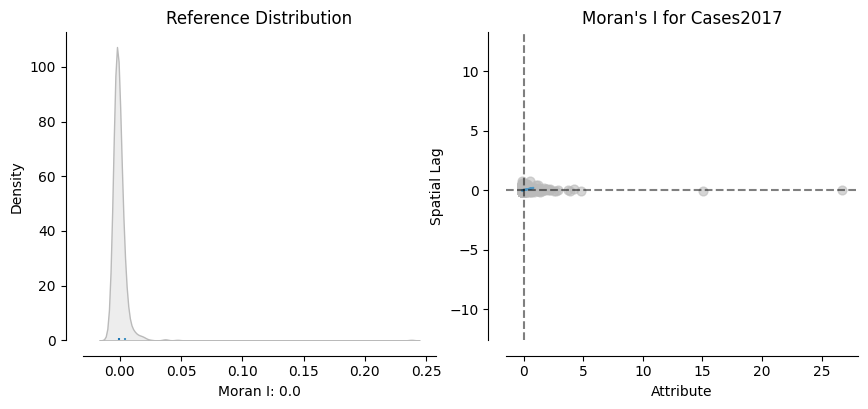

60 -
Column: Cases2018, Moran's I: 0.045463467393277265, p-value: 0.003
Column: Cases2018, geary's I: 0.8922740410165857, p_value_geary: 0.02


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


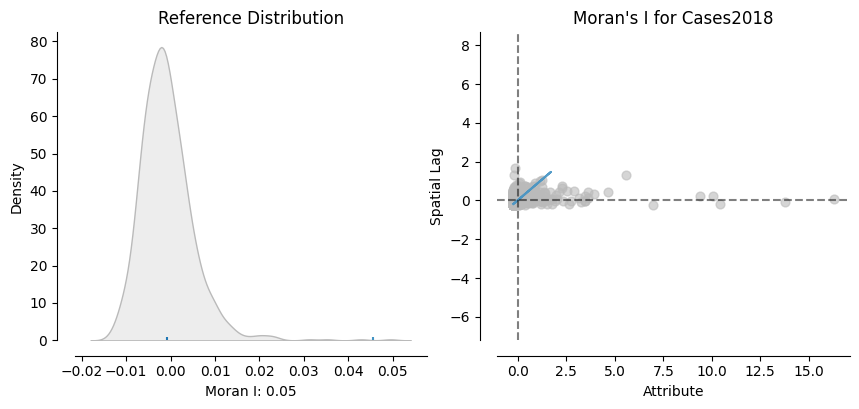

60 -
Column: Age0-4(%), Moran's I: 0.461854229768219, p-value: 0.001
Column: Age0-4(%), geary's I: 0.48488525364769464, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


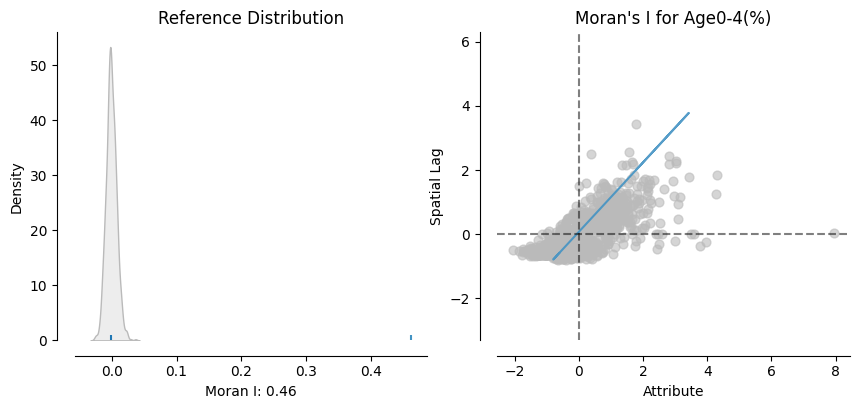

60 -
Column: Age5-14(%), Moran's I: 0.5532499429304271, p-value: 0.001
Column: Age5-14(%), geary's I: 0.370308243137445, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


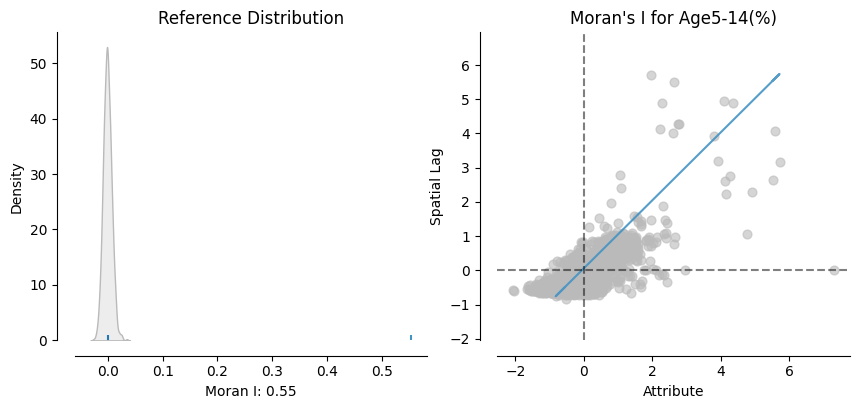

60 -
Column: Age15-29(%), Moran's I: 0.344947414363361, p-value: 0.001
Column: Age15-29(%), geary's I: 0.6517062740884326, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


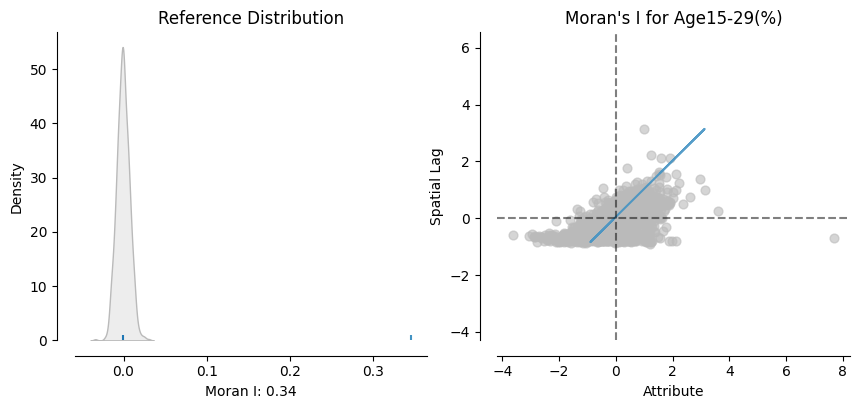

60 -
Column: Age>30(%), Moran's I: 0.5424383609066094, p-value: 0.001
Column: Age>30(%), geary's I: 0.41392200894449876, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


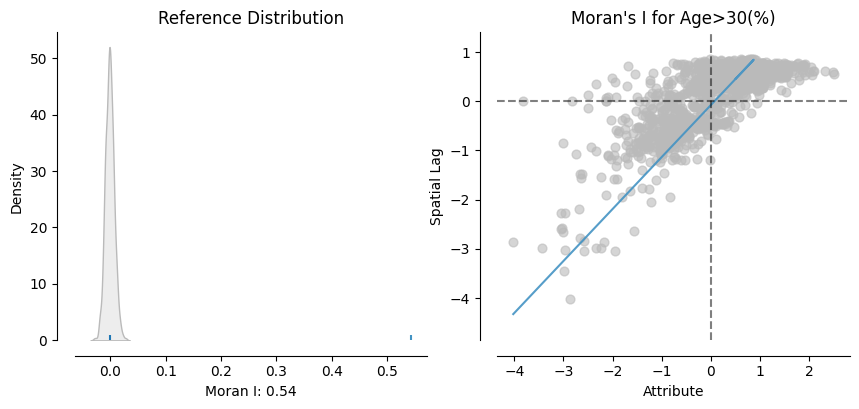

60 -
Column: AfrocolombianPopulation(%), Moran's I: 0.38437626852873036, p-value: 0.001
Column: AfrocolombianPopulation(%), geary's I: 0.5509858380185239, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


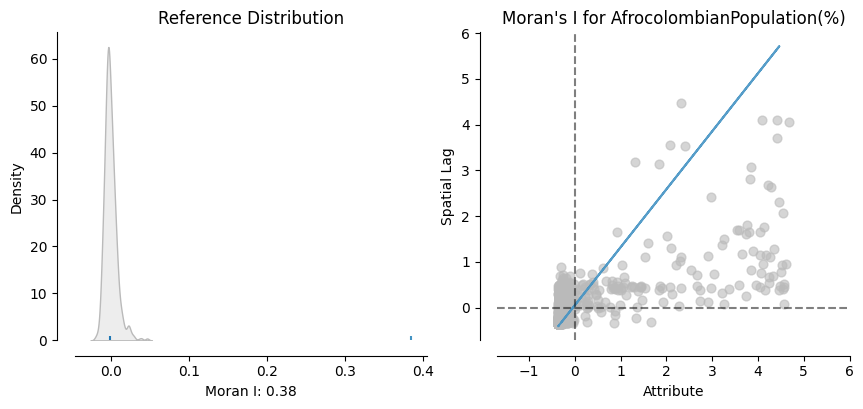

60 -
Column: IndianPopulation(%), Moran's I: 0.4103132179511756, p-value: 0.001
Column: IndianPopulation(%), geary's I: 0.5126607424345695, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


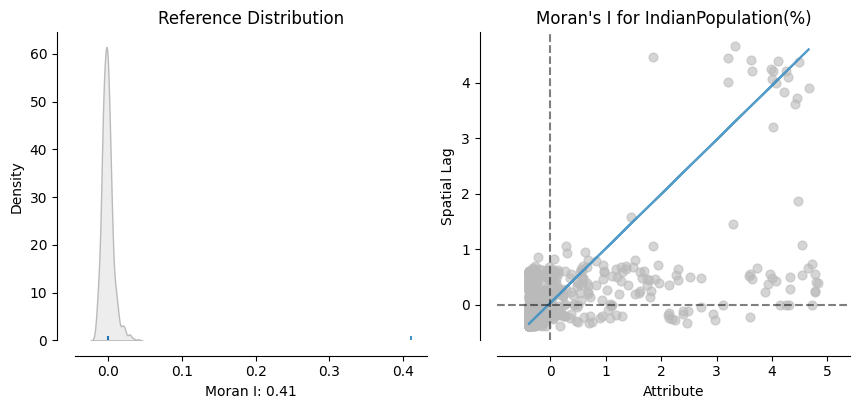

60 -
Column: PeoplewithDisabilities(%), Moran's I: 0.23961943592782947, p-value: 0.001
Column: PeoplewithDisabilities(%), geary's I: 0.7708802318968222, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


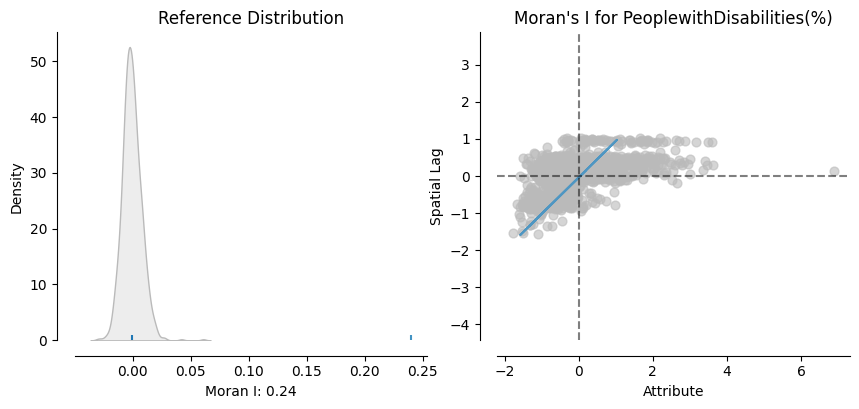

60 -
Column: Peoplewhocannotreadorwrite(%), Moran's I: 0.2925652245072089, p-value: 0.001
Column: Peoplewhocannotreadorwrite(%), geary's I: 0.6878792584734302, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


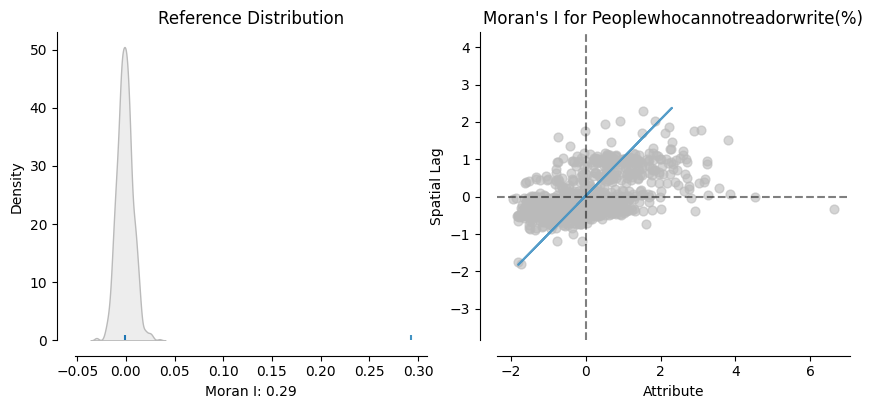

60 -
Column: Secondary/HigherEducation(%), Moran's I: 0.19449602254754716, p-value: 0.001
Column: Secondary/HigherEducation(%), geary's I: 0.8043906814323109, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


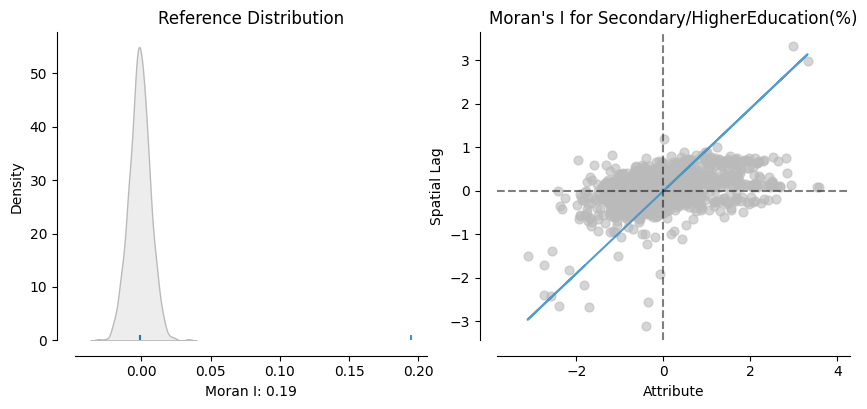

60 -
Column: Employedpopulation(%), Moran's I: 0.41218355589175654, p-value: 0.001
Column: Employedpopulation(%), geary's I: 0.5564701238705132, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


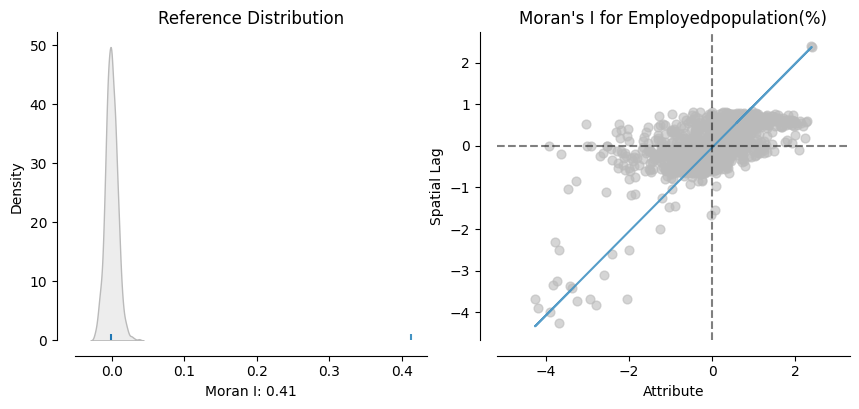

60 -
Column: Unemployedpopulation(%), Moran's I: 0.166455553942142, p-value: 0.001
Column: Unemployedpopulation(%), geary's I: 0.8474139205742184, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


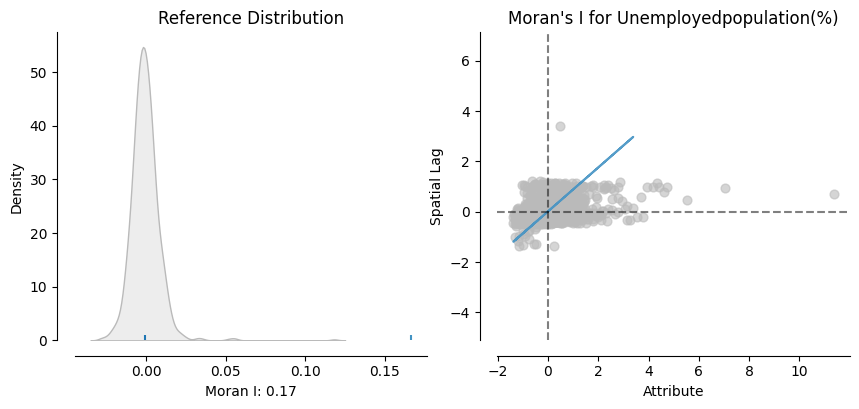

60 -
Column: Peopledoinghousework(%), Moran's I: 0.15529470724044717, p-value: 0.001
Column: Peopledoinghousework(%), geary's I: 0.8548095397420677, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


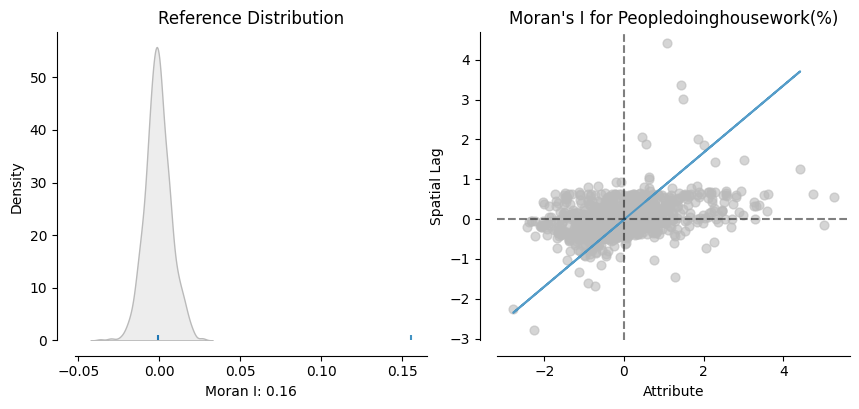

60 -
Column: Retiredpeople(%), Moran's I: 0.2584248357912593, p-value: 0.001
Column: Retiredpeople(%), geary's I: 0.7583581838127795, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


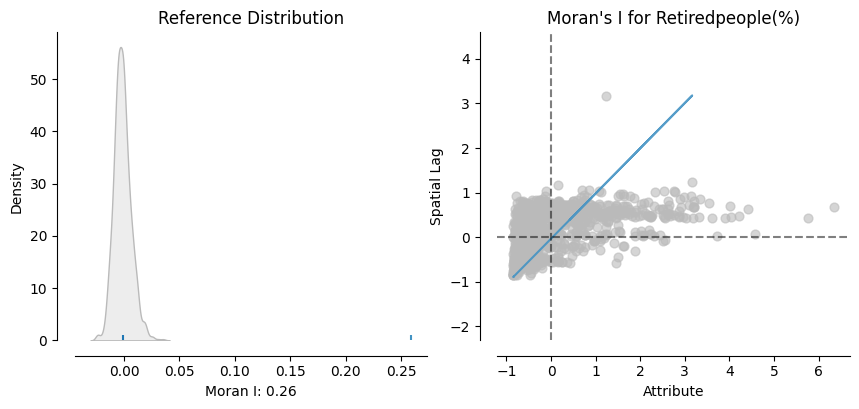

60 -
Column: Men(%), Moran's I: 0.17148784298892306, p-value: 0.001
Column: Men(%), geary's I: 0.8273245493684641, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


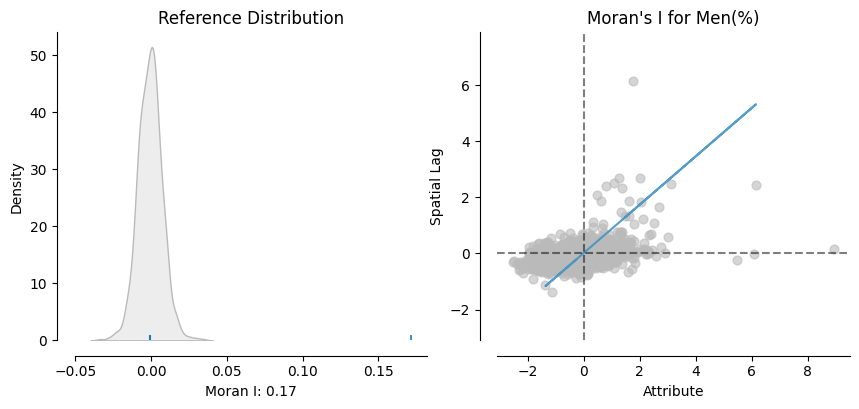

60 -
Column: Women(%), Moran's I: 0.17148784298892308, p-value: 0.001
Column: Women(%), geary's I: 0.8273245493684643, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


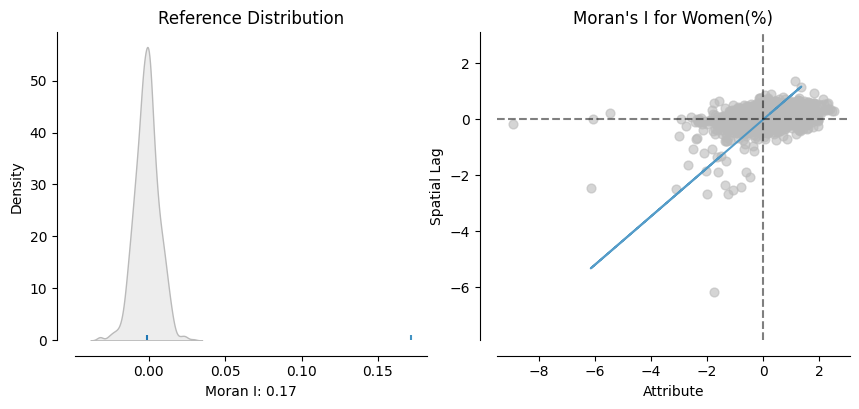

60 -
Column: Householdswithoutwateraccess(%), Moran's I: 0.2975228881053046, p-value: 0.001
Column: Householdswithoutwateraccess(%), geary's I: 0.6468149673028586, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


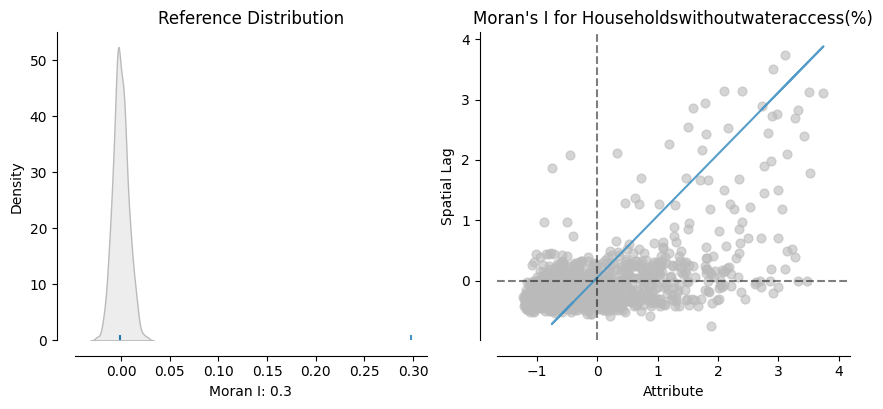

60 -
Column: Householdswithoutinternetaccess(%), Moran's I: 0.3477916385488174, p-value: 0.001
Column: Householdswithoutinternetaccess(%), geary's I: 0.6618276162265648, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


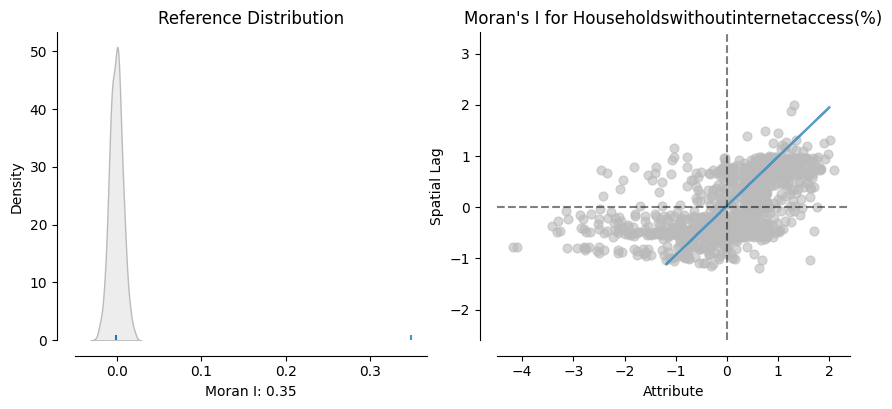

60 -
Column: Buildingstratification1(%), Moran's I: 0.5909515914868883, p-value: 0.001
Column: Buildingstratification1(%), geary's I: 0.4219456216193266, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


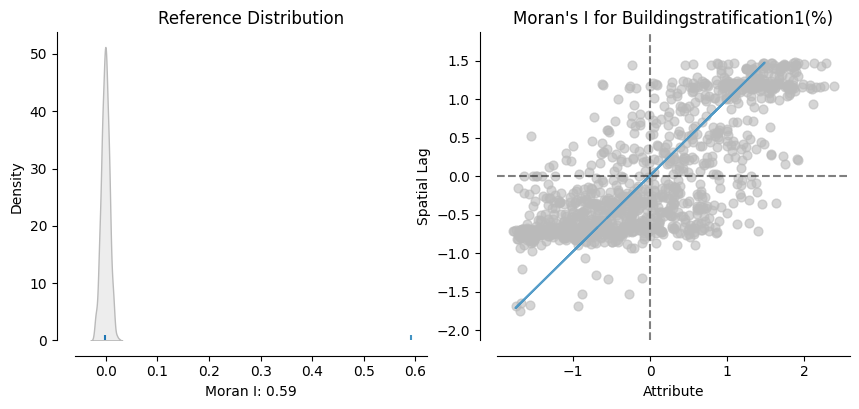

60 -
Column: Buildingstratification2(%), Moran's I: 0.4957894208904284, p-value: 0.001
Column: Buildingstratification2(%), geary's I: 0.5111333367914275, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


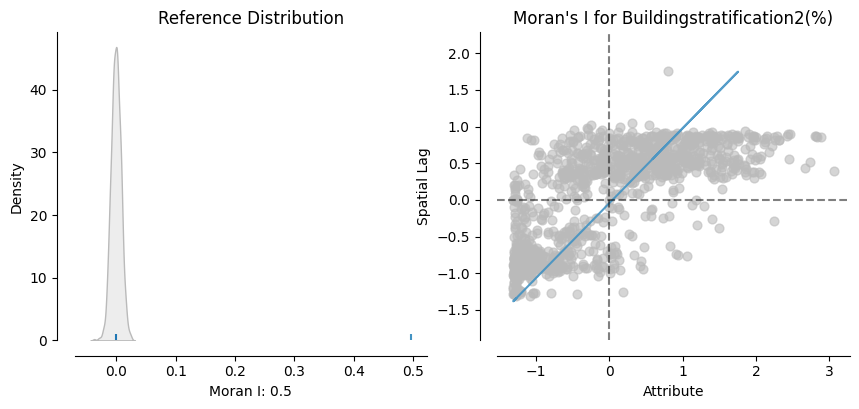

60 -
Column: Buildingstratification3(%), Moran's I: 0.20178086014076774, p-value: 0.001
Column: Buildingstratification3(%), geary's I: 0.8326662990369793, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


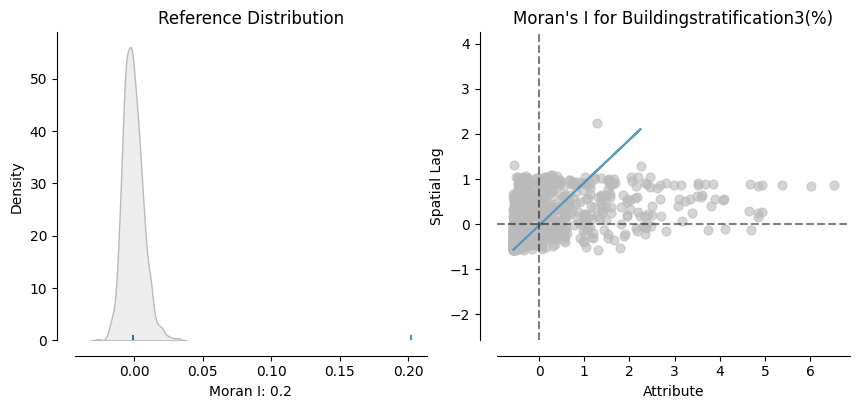

60 -
Column: Buildingstratification4(%), Moran's I: 0.029557105852515402, p-value: 0.009
Column: Buildingstratification4(%), geary's I: 1.0083361537372901, p_value_geary: 0.412


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


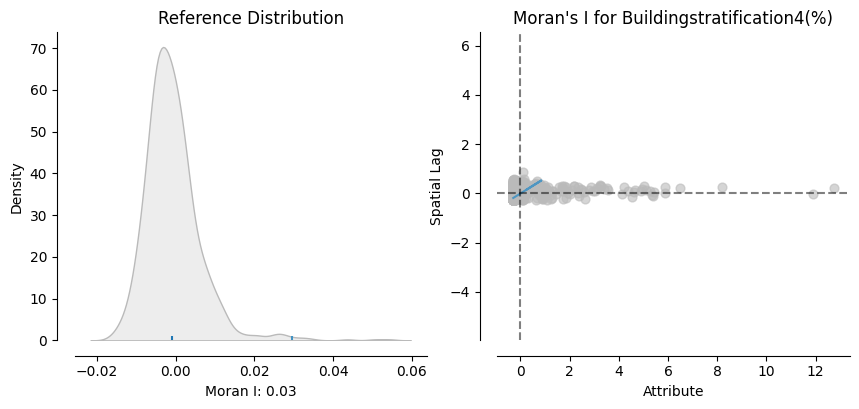

60 -
Column: Buildingstratification5(%), Moran's I: 0.021307680450296462, p-value: 0.011
Column: Buildingstratification5(%), geary's I: 1.0171631081986183, p_value_geary: 0.382


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


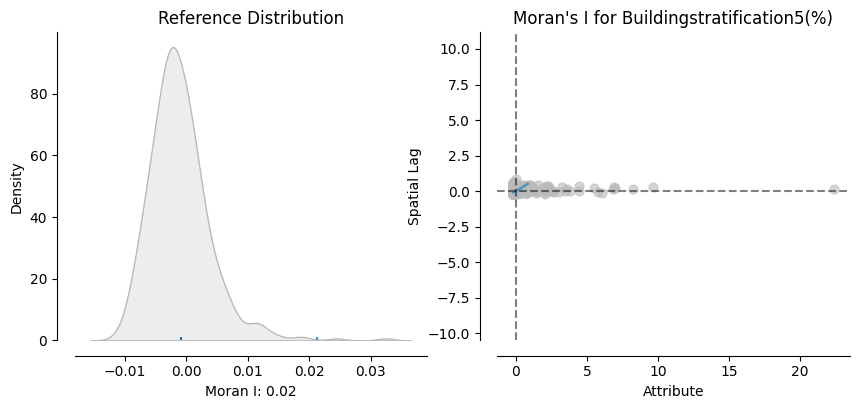

60 -
Column: Buildingstratification6(%), Moran's I: 0.01614718578940217, p-value: 0.015
Column: Buildingstratification6(%), geary's I: 1.0172170820031186, p_value_geary: 0.299


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


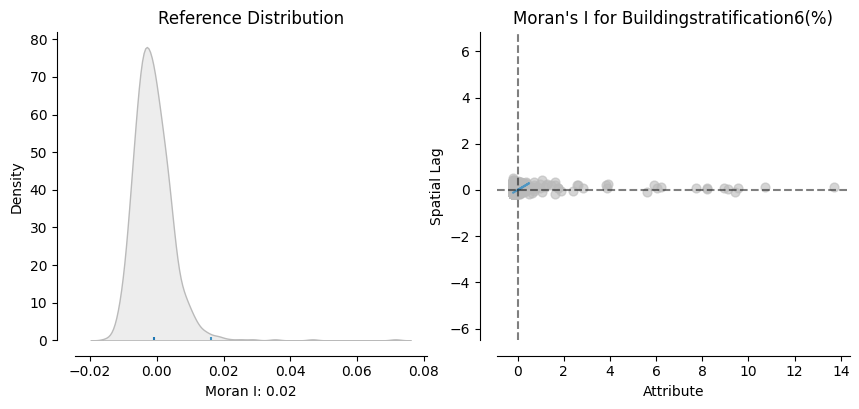

60 -
Column: NumberofhospitalsperKm2, Moran's I: 0.014701939238698402, p-value: 0.018
Column: NumberofhospitalsperKm2, geary's I: 0.9906084918482083, p_value_geary: 0.312


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


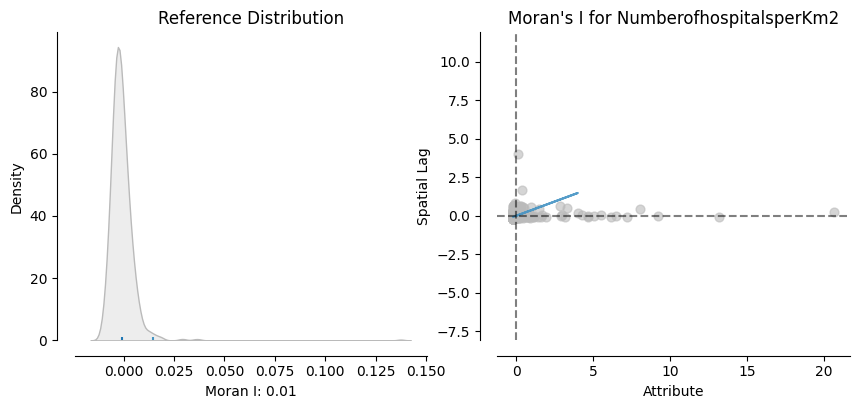

60 -
Column: NumberofhousesperKm2, Moran's I: 0.021154132365211426, p-value: 0.008
Column: NumberofhousesperKm2, geary's I: 1.019121043321307, p_value_geary: 0.377


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


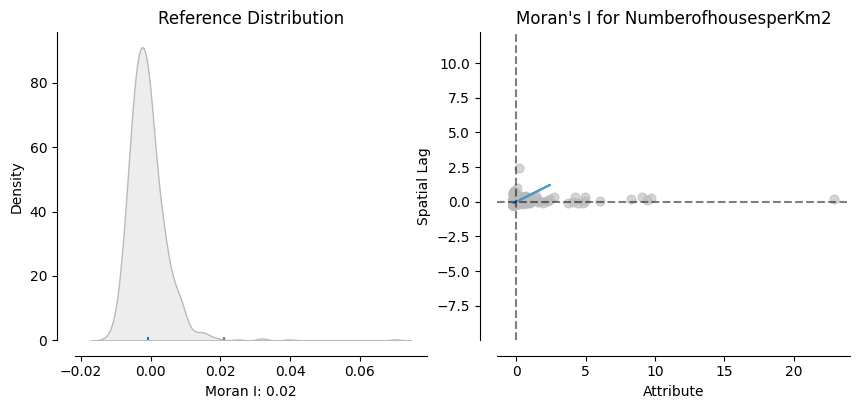

60 -
Column: Código Municipio, Moran's I: 0.46821764682720707, p-value: 0.001
Column: Código Municipio, geary's I: 0.5096388116563104, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


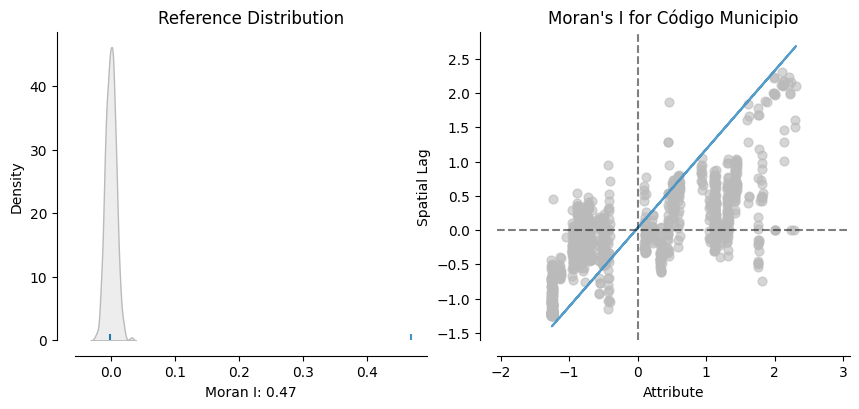

60 -
Column: Longitud, Moran's I: 0.9081608563756277, p-value: 0.001
Column: Longitud, geary's I: 0.039559052378074076, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


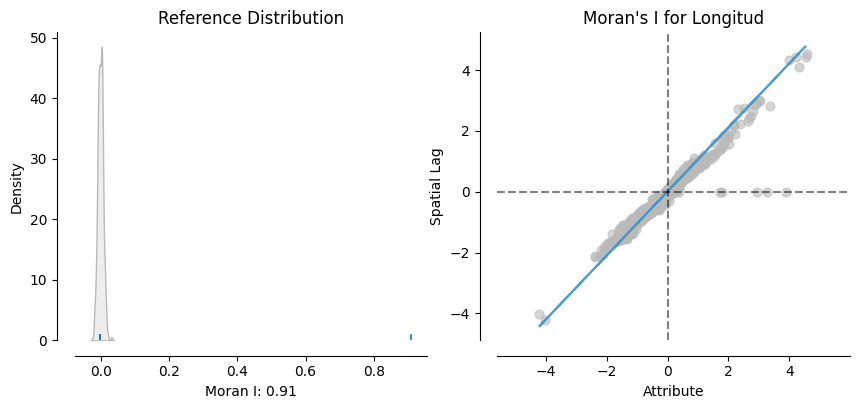

60 -
Column: Latitud, Moran's I: 0.9473223441923575, p-value: 0.001
Column: Latitud, geary's I: 0.017703438149443442, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


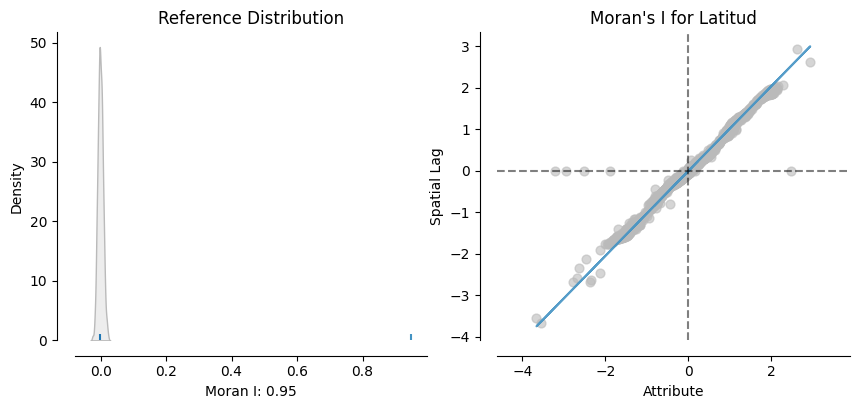

60 -
Column: 2016_dengue, Moran's I: 0.004074484087888983, p-value: 0.067
Column: 2016_dengue, geary's I: 0.9806195116675999, p_value_geary: 0.319


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


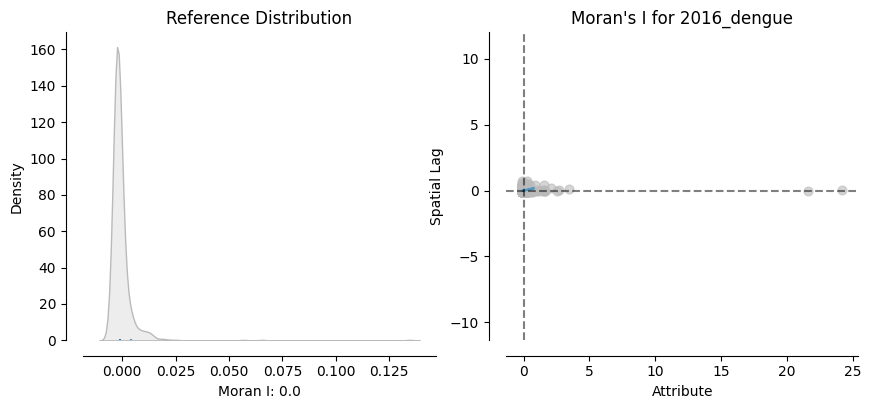

60 -
Column: 2017_dengue, Moran's I: 0.004222927252042583, p-value: 0.086
Column: 2017_dengue, geary's I: 0.9519514448035538, p_value_geary: 0.19


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


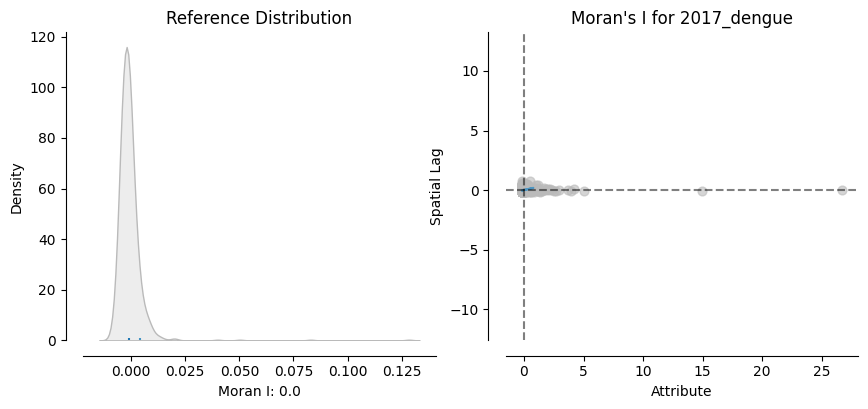

60 -
Column: 2018_dengue, Moran's I: 0.04591424868641553, p-value: 0.004
Column: 2018_dengue, geary's I: 0.8916094792026684, p_value_geary: 0.018


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


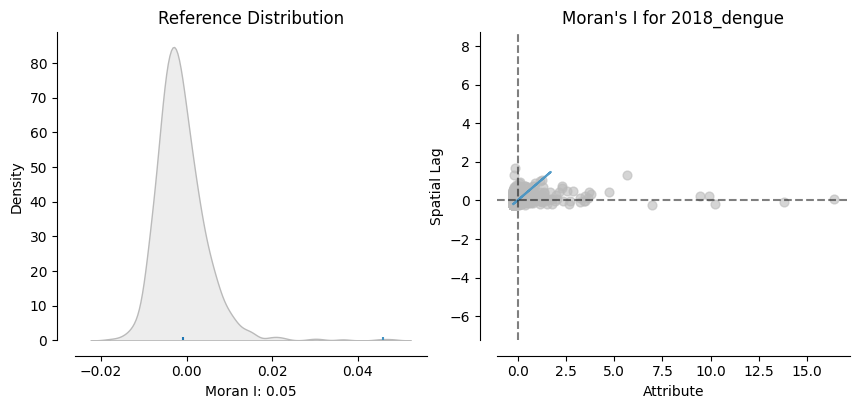

60 -
Column: 2016_temp, Moran's I: 0.502900012357551, p-value: 0.001
Column: 2016_temp, geary's I: 0.5066110183792502, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


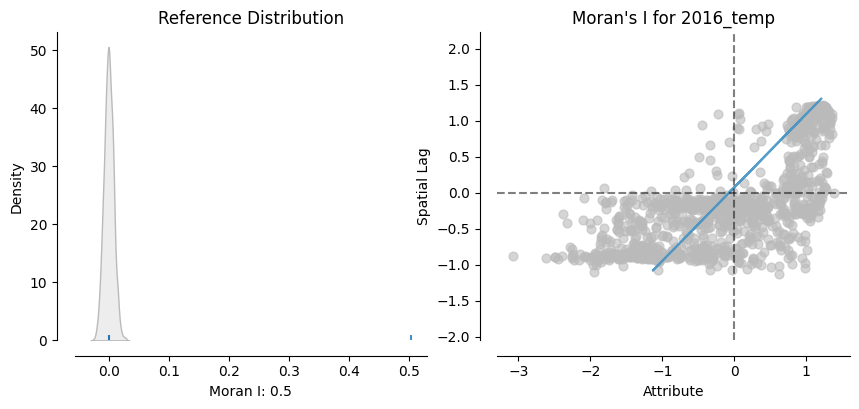

60 -
Column: 2017_temp, Moran's I: 0.5029691218932382, p-value: 0.001
Column: 2017_temp, geary's I: 0.5064576620192592, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


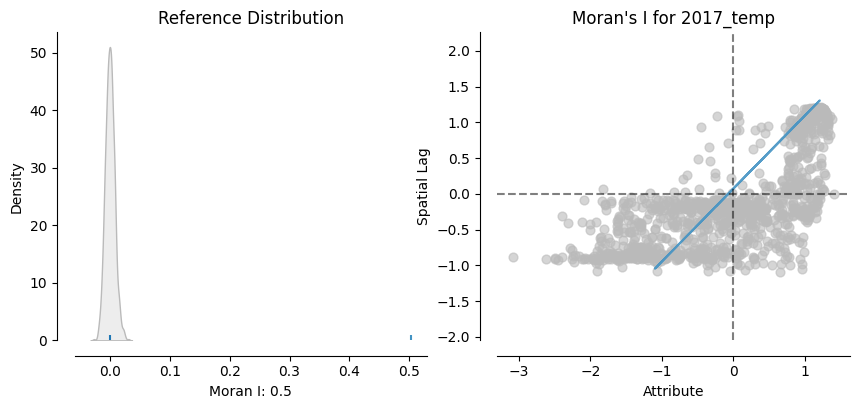

60 -
Column: 2018_temp, Moran's I: 0.500104777763509, p-value: 0.001
Column: 2018_temp, geary's I: 0.509305031630767, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


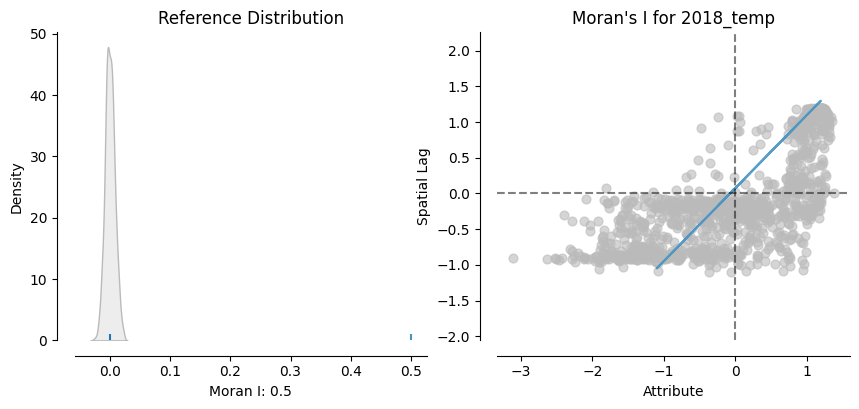

60 -
Column: 2016_precip, Moran's I: 0.525267516848103, p-value: 0.001
Column: 2016_precip, geary's I: 0.3974483558653019, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


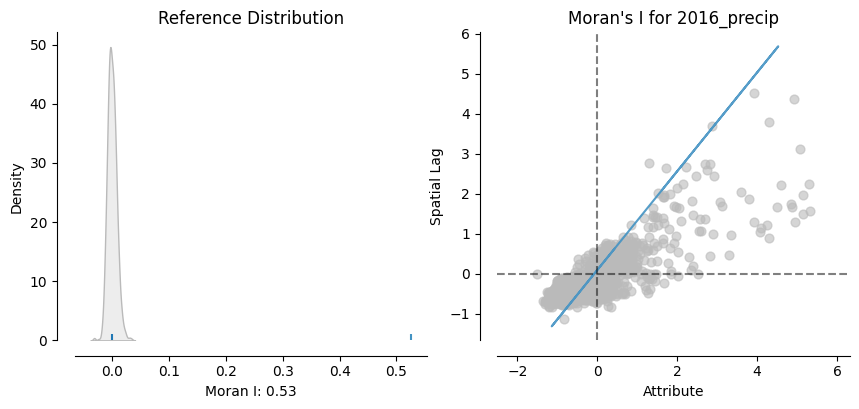

60 -
Column: 2017_precip, Moran's I: 0.5350518653590424, p-value: 0.001
Column: 2017_precip, geary's I: 0.3884086471316025, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


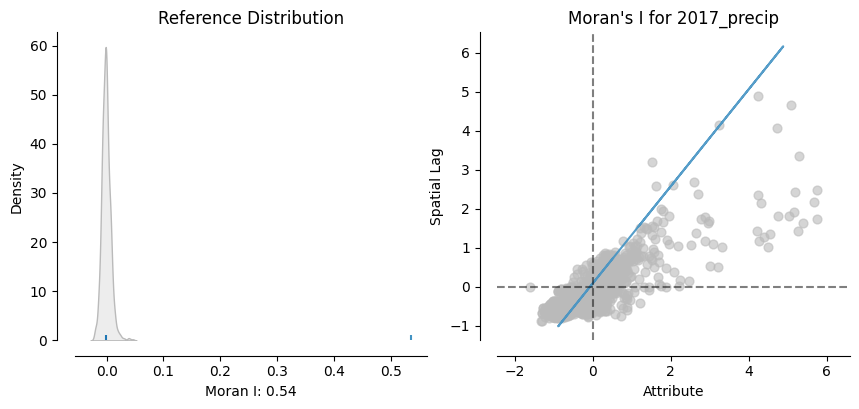

60 -
Column: 2018_precip, Moran's I: 0.5200794862809884, p-value: 0.001
Column: 2018_precip, geary's I: 0.40609260268381697, p_value_geary: 0.001


/Users/sebasmos/anaconda3/envs/ARF_paper/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


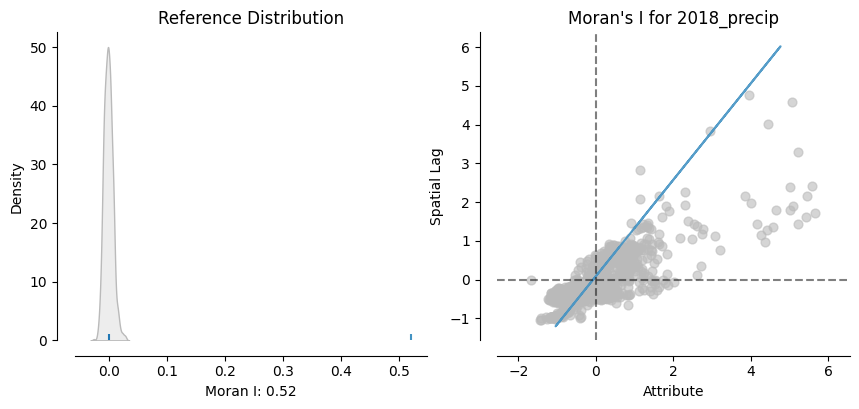

60 -


In [7]:
columns_to_analyze = ['Population2016', 'Population2017',
       'Population2018', 'Cases2016', 'Cases2017', 'Cases2018', 'Age0-4(%)',
       'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)',
       'IndianPopulation(%)', 'PeoplewithDisabilities(%)',
       'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)',
       'Employedpopulation(%)', 'Unemployedpopulation(%)',
       'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)',
       'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)',
       'Buildingstratification1(%)', 'Buildingstratification2(%)',
       'Buildingstratification3(%)', 'Buildingstratification4(%)',
       'Buildingstratification5(%)', 'Buildingstratification6(%)',
       'NumberofhospitalsperKm2', 'NumberofhousesperKm2', 'Código Municipio',
       'Longitud', 'Latitud', '2016_dengue', '2017_dengue', '2018_dengue',
       '2016_temp', '2017_temp', '2018_temp', '2016_precip', '2017_precip',
       '2018_precip']

morans_i_list = []
gearys_c_list = []

for column in columns_to_analyze:
    morans_i, p_value, w = calculate_morans_i(gdf, column)
    print(f"Column: {column}, Moran's I: {morans_i}, p-value: {p_value}")
    morans_i_list.append((column, morans_i, p_value))
    
    gearys_c, p_value_geary = calculate_gearys_c(gdf, column)
    gearys_c_list.append((column, gearys_c, p_value_geary))
    print(f"Column: {column}, geary's I: {gearys_c}, p_value_geary: {p_value_geary}")
    
    moran = esda.Moran(gdf[column], w)
    plot_moran(moran, zstandard=True, figsize=(10, 4), fitline_kwds=dict(color='#4393c3'))
    plt.title(f"Moran's I for {column}")
    plt.show()
    print(60, "-")
    

In [8]:
morans_i_df = pd.DataFrame(morans_i_list, columns=['Column', "Moran's I", 'p-value_Moran'])
gearys_c_df = pd.DataFrame(gearys_c_list, columns=['Column', "Geary's C", 'p-value_Geary'])

merged_df = pd.merge(morans_i_df, gearys_c_df, on='Column')

cols = ["Column",  "Moran's I",  "Geary's C"]
merged_df = merged_df[cols]
merged_df = merged_df.sort_values(by="Moran's I", ascending=False).reset_index(drop=True)


# Save merged DataFrame to CSV
merged_df[:20].round(3).to_csv('merged_results.csv', index=False)

# Confirm the merged data
merged_df

,Column,Moran's I,Geary's C
0,Latitud,0.947322,0.017703
1,Longitud,0.908161,0.039559
2,Buildingstratification1(%),0.590952,0.421946
3,Age5-14(%),0.553250,0.370308
4,Age>30(%),0.542438,0.413922
5,2017_precip,0.535052,0.388409
6,2016_precip,0.525268,0.397448
7,2018_precip,0.520079,0.406093
8,2017_temp,0.502969,0.506458
9,2016_temp,0.502900,0.506611


In [9]:
population_df = merged_df[merged_df['Column'].str.contains('Population20')]
# population_mean = population_df.mean()

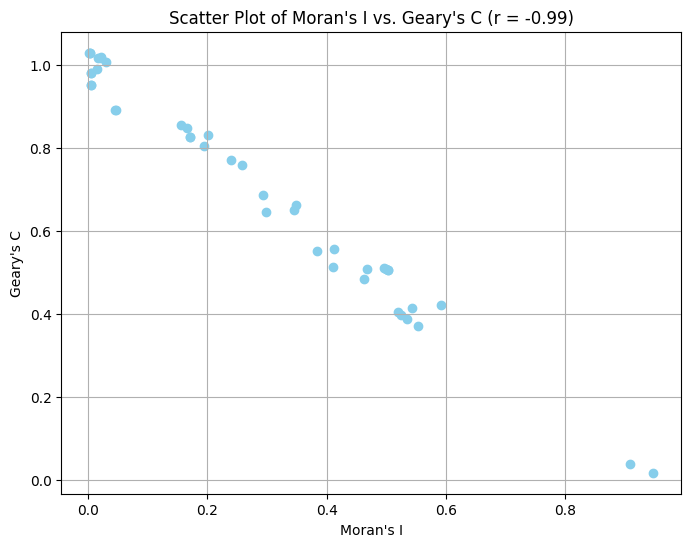

In [10]:
# https://www.researchgate.net/figure/Scatter-plot-of-variables-Morans-I-Gearys-C-and-SAdocumentclass12ptminimal_fig4_359367748
# Scatter plot of Moran's I vs Geary's C

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient (r)
r, _ = pearsonr(merged_df["Moran's I"], merged_df["Geary's C"])

# Scatter plot of Moran's I vs Geary's C
plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Moran's I"], merged_df["Geary's C"], color='skyblue')
plt.title(f"Scatter Plot of Moran's I vs. Geary's C (r = {r:.2f})")
plt.xlabel("Moran's I")
plt.ylabel("Geary's C")
plt.grid(True)
plt.show()

In [ ]:
merged_df

,Column,Moran's I,p-value_Moran,Geary's C,p-value_Geary
0,Population2016,0.002172,0.122,1.029826,0.398
1,Population2017,0.002333,0.138,1.029657,0.377
2,Population2018,0.002535,0.129,1.029273,0.421
3,Cases2016,0.004074,0.080,0.980620,0.293
4,Cases2017,0.004298,0.093,0.952215,0.154
5,Cases2018,0.045463,0.003,0.892274,0.016
6,Age0-4(%),0.461854,0.001,0.484885,0.001
7,Age5-14(%),0.553250,0.001,0.370308,0.001
8,Age15-29(%),0.344947,0.001,0.651706,0.001
9,Age>30(%),0.542438,0.001,0.413922,0.001


In [ ]:
# Filter columns with years 2016 to 2018
columns_2016_to_2018 = ['Population2016', 'Population2017', 'Population2018', '2016_temp', '2017_temp','2018_temp','2016_precip','2017_precip','2018_precip']
target = ["2016_dengue","2017_dengue","2018_dengue"]

### Spatial Stratified Heterogeneity (SSH)

In [ ]:
data

,Municipality code,Municipality,Population2016,Population2017,Population2018,Cases2016,Cases2017,Cases2018,Age0-4(%),Age5-14(%),...,2016_dengue,2017_dengue,2018_dengue,2016_temp,2017_temp,2018_temp,2016_precip,2017_precip,2018_precip,strata
0,5001,Medellín,2420516,2414616,2427129,17306,2100,1172,5.16,11.96,...,332.807692,39.924528,22.666667,21.943911,21.350182,21.257987,170.860412,192.815909,215.531162,3
1,5002,Abejorral,19979,20047,20367,5,1,2,5.24,14.92,...,0.096154,0.018868,0.039216,17.427445,16.812016,16.765922,170.362537,189.626654,213.986592,3
2,5004,Abriaquí,2539,2593,2695,2,0,1,6.07,14.08,...,0.038462,0.000000,0.019608,17.989909,17.394741,17.339569,154.819131,182.611120,194.359353,2
3,5021,Alejandría,4543,4570,4657,5,0,0,6.59,15.73,...,0.096154,0.000000,0.000000,21.773094,21.145504,21.053678,182.093695,203.085915,231.360449,3
4,5030,Amagá,29006,29429,30227,196,17,3,5.42,13.36,...,3.769231,0.320755,0.058824,21.683445,21.088197,21.019708,161.462956,182.512327,202.977114,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,97889,Yavaraté,1073,1027,1048,0,0,0,5.03,48.15,...,0.000000,0.000000,0.000000,26.495327,25.959433,25.887254,302.846812,288.845788,299.388878,3
1114,99001,Puerto Carreño,20921,21087,20936,32,5,5,10.61,20.52,...,0.615385,0.094340,0.098039,29.074172,28.353492,28.056971,225.019284,194.526000,198.746806,3
1115,99524,La Primavera,10098,10233,10122,72,0,3,10.37,23.27,...,1.384615,0.000000,0.058824,28.600824,27.925774,27.713020,216.190884,202.300431,212.506434,3
1116,99624,Santa Rosalía,4296,4083,4059,14,9,0,9.34,25.34,...,0.269231,0.169811,0.000000,27.970317,27.318024,27.171170,214.010459,202.843428,221.696004,3


/var/folders/79/lmgzzcl17bb5gc349jpl0mvm0000gn/T/ipykernel_23469/423399021.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Strata'] = strata_labels


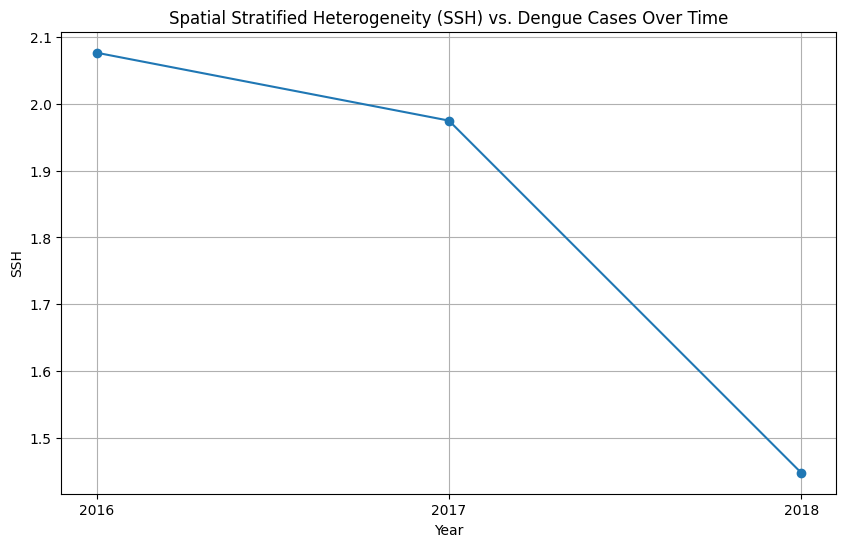

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming data_df contains the data for 1000 cities
# Create a sample DataFrame for demonstration
# data_df = pd.DataFrame()

# Assuming columns_to_analyze contains the columns as described
columns_to_analyze = ['Population2016', 'Population2017', 'Population2018', 'Cases2016', 'Cases2017', 'Cases2018', 
                      'Age0-4(%)', 'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)', 
                      'IndianPopulation(%)', 'PeoplewithDisabilities(%)', 'Peoplewhocannotreadorwrite(%)', 
                      'Secondary/HigherEducation(%)', 'Employedpopulation(%)', 'Unemployedpopulation(%)', 
                      'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)', 
                      'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)', 
                      'Buildingstratification1(%)', 'Buildingstratification2(%)', 'Buildingstratification3(%)', 
                      'Buildingstratification4(%)', 'Buildingstratification5(%)', 'Buildingstratification6(%)', 
                      'NumberofhospitalsperKm2', 'NumberofhousesperKm2', 'Código Municipio', 'Longitud', 'Latitud', 
                      '2016_dengue', '2017_dengue', '2018_dengue', '2016_temp', '2017_temp', '2018_temp', 
                      '2016_precip', '2017_precip', '2018_precip']

# Extract relevant columns
data = data[columns_to_analyze]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Apply KMeans clustering to identify strata
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters based on the data
strata_labels = kmeans.fit_predict(data_pca)


# Add strata labels to the DataFrame
data['Strata'] = strata_labels

# Calculate SSH for each year
ssh_values = []
for year in ['2016_dengue', '2017_dengue', '2018_dengue']:
    ssh = data.groupby('Strata')[year].mean().std() / data.groupby('Strata')[year].mean().mean()
    ssh_values.append(ssh)

# Visualize SSH values against dengue cases for each year
plt.figure(figsize=(10, 6))
plt.plot(['2016', '2017', '2018'], ssh_values, marker='o')
plt.title('Spatial Stratified Heterogeneity (SSH) vs. Dengue Cases Over Time')
plt.xlabel('Year')
plt.ylabel('SSH')
plt.grid(True)
plt.show()


In [ ]:
data.columns

Index(['Population2016', 'Population2017', 'Population2018', 'Cases2016',
       'Cases2017', 'Cases2018', 'Age0-4(%)', 'Age5-14(%)', 'Age15-29(%)',
       'Age>30(%)', 'AfrocolombianPopulation(%)', 'IndianPopulation(%)',
       'PeoplewithDisabilities(%)', 'Peoplewhocannotreadorwrite(%)',
       'Secondary/HigherEducation(%)', 'Employedpopulation(%)',
       'Unemployedpopulation(%)', 'Peopledoinghousework(%)',
       'Retiredpeople(%)', 'Men(%)', 'Women(%)',
       'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)',
       'Buildingstratification1(%)', 'Buildingstratification2(%)',
       'Buildingstratification3(%)', 'Buildingstratification4(%)',
       'Buildingstratification5(%)', 'Buildingstratification6(%)',
       'NumberofhospitalsperKm2', 'NumberofhousesperKm2', 'Código Municipio',
       'Longitud', 'Latitud', '2016_dengue', '2017_dengue', '2018_dengue',
       '2016_temp', '2017_temp', '2018_temp', '2016_precip', '2017_precip',
       '2018_precip', 'St

In [12]:

from scipy import stats
import statsmodels.api as sm
import statsmodels

from scipy import stats
import statsmodels.api as sm


population_cols = ['Population2016', 'Population2017',
       'Population2018', 'Cases2016', 'Cases2017', 'Cases2018', 'Age0-4(%)',
       'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)',
       'IndianPopulation(%)', 'PeoplewithDisabilities(%)',
       'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)',
       'Employedpopulation(%)', 'Unemployedpopulation(%)',
       'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)',
       'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)',
       'Buildingstratification1(%)', 'Buildingstratification2(%)',
       'Buildingstratification3(%)', 'Buildingstratification4(%)',
       'Buildingstratification5(%)', 'Buildingstratification6(%)',
       'NumberofhospitalsperKm2', 'NumberofhousesperKm2', 'Código Municipio',
       'Longitud', 'Latitud', 
       '2016_temp', '2017_temp', '2018_temp', '2016_precip', '2017_precip',
       '2018_precip']
dengue_cols = ['2016_dengue', '2017_dengue', '2018_dengue']
 
# Function to calculate metrics
def calculate_metrics(population_data, dengue_data):
    metrics = {}
    
    # Mean, Median, Mode
    metrics['mean'] = population_data.mean()
    metrics['median'] = population_data.median()
    metrics['mode'] = population_data.mode().iloc[0]  # Mode may return multiple values, so we take the first one
    
    # Variance, Standard Deviation
    metrics['variance'] = population_data.var()
    metrics['std_dev'] = population_data.std()
    
    # Skewness, Kurtosis
    metrics['skewness'] = population_data.skew()
    metrics['kurtosis'] = population_data.kurtosis()
    
    # Correlation Coefficient
    metrics['correlation_coefficient'] = population_data.corr(dengue_data)
    
    # Q-statistic
    X = sm.add_constant(population_data)
    model = sm.OLS(dengue_data, X)
    results = model.fit()
    q_statistic, p_value, _,= sm.stats.diagnostic.het_goldfeldquandt(dengue_data, X)
    metrics['q_statistic'] = q_statistic

    # # Spatial Stability of Health (SSH) --> zeros!
    # ssh = population_data.mean().std() / population_data.mean().mean()
    # metrics['ssh'] = ssh
    
    return metrics

results = []

# Loop through each population column
for col in population_cols:
    col_results = {'Column': col}
    for dengue_col in dengue_cols:
        # Calculate metrics
        metrics = calculate_metrics(data[col], data[dengue_col])
        for metric_name, metric_value in metrics.items():
            col_results[f"{dengue_col}_{metric_name}"] = metric_value
    results.append(col_results)

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv('q_statistic_results.csv', index=False)


In [13]:
results_df

,Column,2016_dengue_mean,2016_dengue_median,2016_dengue_mode,2016_dengue_variance,2016_dengue_std_dev,2016_dengue_skewness,2016_dengue_kurtosis,2016_dengue_correlation_coefficient,2016_dengue_q_statistic,...,2018_dengue_mean,2018_dengue_median,2018_dengue_mode,2018_dengue_variance,2018_dengue_std_dev,2018_dengue_skewness,2018_dengue_kurtosis,2018_dengue_correlation_coefficient,2018_dengue_q_statistic,2018_dengue_ssh
0,Population2016,41916.579606,12729.000000,2354.000000,6.250559e+10,250011.174453,23.435369,646.152815,0.414230,0.283638,...,41916.579606,12729.000000,2354.000000,6.250559e+10,250011.174453,23.435369,646.152815,0.326145,1.334507,0.0
1,Population2017,42370.178891,12675.000000,3569.000000,6.319611e+10,251388.357718,23.430558,646.692953,0.411878,0.291308,...,42370.178891,12675.000000,3569.000000,6.319611e+10,251388.357718,23.430558,646.692953,0.326549,1.320314,0.0
2,Population2018,43130.330054,12807.000000,11159.000000,6.465396e+10,254271.435962,23.372540,644.685249,0.410591,0.298652,...,43130.330054,12807.000000,11159.000000,6.465396e+10,254271.435962,23.372540,644.685249,0.328780,1.303407,0.0
3,Cases2016,89.421288,8.000000,0.000000,6.373118e+05,798.318082,21.822777,501.003657,1.000000,0.643465,...,89.421288,8.000000,0.000000,6.373118e+05,798.318082,21.822777,501.003657,0.449563,2.164290,0.0
4,Cases2017,22.404293,2.000000,0.000000,1.903213e+04,137.956999,20.590181,504.200550,0.937679,0.332330,...,22.404293,2.000000,0.000000,1.903213e+04,137.956999,20.590181,504.200550,0.607888,2.802184,0.0
5,Cases2018,38.909660,2.000000,0.000000,2.649144e+04,162.761905,9.911349,123.991445,0.454091,1.188282,...,38.909660,2.000000,0.000000,2.649144e+04,162.761905,9.911349,123.991445,0.999944,1.568445,0.0
6,Age0-4(%),7.312093,6.965000,5.840000,3.913905e+00,1.978359,1.307783,4.310906,-0.068117,1.271480,...,7.312093,6.965000,5.840000,3.913905e+00,1.978359,1.307783,4.310906,0.030519,2.318638,0.0
7,Age5-14(%),17.845680,17.015000,16.480000,1.729955e+01,4.159273,1.789230,6.554539,-0.094847,1.273244,...,17.845680,17.015000,16.480000,1.729955e+01,4.159273,1.789230,6.554539,-0.027074,2.288670,0.0
8,Age15-29(%),24.612227,24.920000,25.000000,8.663553e+00,2.943391,0.050881,3.079473,0.027496,1.276246,...,24.612227,24.920000,25.000000,8.663553e+00,2.943391,0.050881,3.079473,0.125726,2.327689,0.0
9,Age>30(%),50.230125,51.045000,48.130000,5.991639e+01,7.740568,-0.587348,0.383298,0.057899,1.267660,...,50.230125,51.045000,48.130000,5.991639e+01,7.740568,-0.587348,0.383298,-0.041063,2.326756,0.0


In [ ]:
results_df["2018_dengue_ssh"]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32   -0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: 2018_dengue_ssh, dtype: float64

In [ ]:
results_df

,Column,2016_dengue_mean,2016_dengue_median,2016_dengue_mode,2016_dengue_variance,2016_dengue_std_dev,2016_dengue_skewness,2016_dengue_kurtosis,2016_dengue_correlation_coefficient,2016_dengue_q_statistic,...,2017_dengue_q_statistic,2018_dengue_mean,2018_dengue_median,2018_dengue_mode,2018_dengue_variance,2018_dengue_std_dev,2018_dengue_skewness,2018_dengue_kurtosis,2018_dengue_correlation_coefficient,2018_dengue_q_statistic
0,Population2016,41916.579606,12729.000000,2354.000000,6.250559e+10,250011.174453,23.435369,646.152815,0.414230,0.283638,...,0.570002,41916.579606,12729.000000,2354.000000,6.250559e+10,250011.174453,23.435369,646.152815,0.326145,1.334507
1,Population2017,42370.178891,12675.000000,3569.000000,6.319611e+10,251388.357718,23.430558,646.692953,0.411878,0.291308,...,0.581735,42370.178891,12675.000000,3569.000000,6.319611e+10,251388.357718,23.430558,646.692953,0.326549,1.320314
2,Population2018,43130.330054,12807.000000,11159.000000,6.465396e+10,254271.435962,23.372540,644.685249,0.410591,0.298652,...,0.593534,43130.330054,12807.000000,11159.000000,6.465396e+10,254271.435962,23.372540,644.685249,0.328780,1.303407
3,Cases2016,89.421288,8.000000,0.000000,6.373118e+05,798.318082,21.822777,501.003657,1.000000,0.643465,...,0.710781,89.421288,8.000000,0.000000,6.373118e+05,798.318082,21.822777,501.003657,0.449563,2.164290
4,Cases2017,22.404293,2.000000,0.000000,1.903213e+04,137.956999,20.590181,504.200550,0.937679,0.332330,...,0.253321,22.404293,2.000000,0.000000,1.903213e+04,137.956999,20.590181,504.200550,0.607888,2.802184
5,Cases2018,38.909660,2.000000,0.000000,2.649144e+04,162.761905,9.911349,123.991445,0.454091,1.188282,...,3.519881,38.909660,2.000000,0.000000,2.649144e+04,162.761905,9.911349,123.991445,0.999944,1.568445
6,Age0-4(%),7.312093,6.965000,5.840000,3.913905e+00,1.978359,1.307783,4.310906,-0.068117,1.271480,...,2.840886,7.312093,6.965000,5.840000,3.913905e+00,1.978359,1.307783,4.310906,0.030519,2.318638
7,Age5-14(%),17.845680,17.015000,16.480000,1.729955e+01,4.159273,1.789230,6.554539,-0.094847,1.273244,...,2.834054,17.845680,17.015000,16.480000,1.729955e+01,4.159273,1.789230,6.554539,-0.027074,2.288670
8,Age15-29(%),24.612227,24.920000,25.000000,8.663553e+00,2.943391,0.050881,3.079473,0.027496,1.276246,...,2.891685,24.612227,24.920000,25.000000,8.663553e+00,2.943391,0.050881,3.079473,0.125726,2.327689
9,Age>30(%),50.230125,51.045000,48.130000,5.991639e+01,7.740568,-0.587348,0.383298,0.057899,1.267660,...,2.837980,50.230125,51.045000,48.130000,5.991639e+01,7.740568,-0.587348,0.383298,-0.041063,2.326756


In [ ]:
results_df.columns

Index(['Column', '2016_dengue_mean', '2016_dengue_median', '2016_dengue_mode',
       '2016_dengue_variance', '2016_dengue_std_dev', '2016_dengue_skewness',
       '2016_dengue_kurtosis', '2016_dengue_correlation_coefficient',
       '2016_dengue_q_statistic', '2017_dengue_mean', '2017_dengue_median',
       '2017_dengue_mode', '2017_dengue_variance', '2017_dengue_std_dev',
       '2017_dengue_skewness', '2017_dengue_kurtosis',
       '2017_dengue_correlation_coefficient', '2017_dengue_q_statistic',
       '2018_dengue_mean', '2018_dengue_median', '2018_dengue_mode',
       '2018_dengue_variance', '2018_dengue_std_dev', '2018_dengue_skewness',
       '2018_dengue_kurtosis', '2018_dengue_correlation_coefficient',
       '2018_dengue_q_statistic'],
      dtype='object')

In [ ]:
results_df.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Column,Population2016,Population2017,Population2018,Cases2016,Cases2017,Cases2018,Age0-4(%),Age5-14(%),Age15-29(%),Age>30(%),...,NumberofhousesperKm2,Código Municipio,Longitud,Latitud,2016_temp,2017_temp,2018_temp,2016_precip,2017_precip,2018_precip
2016_dengue_mean,41916.579606,42370.178891,43130.330054,89.421288,22.404293,38.90966,7.312093,17.84568,24.612227,50.230125,...,44.863918,38597.349732,-74.652274,5.608783,22.062878,21.490924,21.413978,140.338011,153.736359,166.097583
2016_dengue_median,12729.0,12675.0,12807.0,8.0,2.0,2.0,6.965,17.015,24.92,51.045,...,11.73533,25820.0,-74.757588,5.54391,22.530645,21.991207,21.934853,125.765739,138.413061,150.68524
2016_dengue_mode,2354.0,3569.0,11159.0,0.0,0.0,0.0,5.84,16.48,25.0,48.13,...,0.010674,5001.0,-81.717141,-4.041859,22.225655,21.635095,21.512438,133.182002,149.161566,161.746459
2016_dengue_variance,62505587351.572441,63196106396.315323,64653963146.364563,637311.760585,19032.133625,26491.437668,3.913905,17.29955,8.663553,59.916393,...,44638.862068,703162616.576772,2.798669,6.967589,32.486882,32.512868,32.353697,4136.042646,5211.083094,5841.745614
2016_dengue_std_dev,250011.174453,251388.357718,254271.435962,798.318082,137.956999,162.761905,1.978359,4.159273,2.943391,7.740568,...,211.279109,26517.21359,1.672922,2.639619,5.699727,5.702006,5.688031,64.312072,72.187832,76.431313
2016_dengue_skewness,23.435369,23.430558,23.37254,21.822777,20.590181,9.911349,1.307783,1.78923,0.050881,-0.587348,...,14.337253,0.455312,0.412569,-0.025275,-0.437914,-0.434761,-0.445914,2.217128,2.52869,2.272364
2016_dengue_kurtosis,646.152815,646.692953,644.685249,501.003657,504.20055,123.991445,4.310906,6.554539,3.079473,0.383298,...,272.648603,-1.123773,1.671447,0.031301,-0.902811,-0.909492,-0.900817,7.142297,9.533064,8.342582
2016_dengue_correlation_coefficient,0.41423,0.411878,0.410591,1.0,0.937679,0.454091,-0.068117,-0.094847,0.027496,0.057899,...,0.41748,0.026744,-0.044889,-0.018091,0.020927,0.02065,0.021263,-0.000181,0.004051,0.005557
2016_dengue_q_statistic,0.283638,0.291308,0.298652,0.643465,0.33233,1.188282,1.27148,1.273244,1.276246,1.26766,...,0.993314,1.279057,1.27416,1.272443,1.273456,1.273473,1.27342,1.275093,1.275782,1.276327


In [ ]:
results_df[["2016_dengue_q_statistic","2017_dengue_q_statistic","2018_dengue_q_statistic"]]

,2016_dengue_q_statistic,2017_dengue_q_statistic,2018_dengue_q_statistic
0,0.283638,0.570002,1.334507
1,0.291308,0.581735,1.320314
2,0.298652,0.593534,1.303407
3,0.643465,0.710781,2.164290
4,0.332330,0.253321,2.802184
5,1.188282,3.519881,1.568445
6,1.271480,2.840886,2.318638
7,1.273244,2.834054,2.288670
8,1.276246,2.891685,2.327689
9,1.267660,2.837980,2.326756
